# Online Shopper Purchasing Prediction - Project Checkpoint

## Names

- Jiayi Zhao
- Beibei Du
- Hongfei Lyu
- Meijiang Shen
- Shirui Huang


## Abstract 
With the shift to digital life, online shopping becomes the major source of consumer consumption for its convenient features and personalized settings. It would be highly profitable if we can learn the patterns and attribution of consumer purchase decisions either for companies to predict and increase profits or to further personalize consumer experiences. Thus, in our project, we aim to predict the final purchase decisions of consumers based on their shopping behaviors. We employ the “Online Shoppers Purchasing Intention” dataset from UCI Machine Learning Repository measuring various aspects of consumer shopping behaviors including time-spent on page, number of pages browsed, special days influence, etc. Then we apply various machine learning models such as logistic regression, K-NN, and decision trees to fit the data and use confusion matrix and classification accuracy as the metrics to evaluate the performance of our models.


## Background

As people are more prone to spending time on shopping online rather than physical shopping in the mall, there are astronomical amounts of merchants deciding to sell their products online or hybrid to gain more profits/ for marketing reasons. Specifically, people choose websites/Apps like Amazon, Ebay, Instacart, etc. Especially during the COVID-19 pandemic, with the condition of quarantine, many people purchase things on their phone/electrical devices and get them delivered. No matter in what case, voluntarily or involuntarily, online shopping becomes both recreational and convenient tools for the customers. While the customers tried to benefit from the online shopping, the online stores needed to target more customers and analyze their behaviors to maximize their benefits. Thus an evaluation process of whether the customers will purchase the product or not becomes the core question the businesses want to answer. As mentioned in *Performance Study of Classification Algorithms for Consumer Online Shopping Attitudes and Behavior Using Data Mining, data mining including the machine learning* has been useful in “to help online shopping stores to identify online customer behavior to recommend for him the appropriate products he/she is interesting to them” <a name="rana"></a>[<sup>[1]</sup>](#rananote). Machine learning has been used as a quantitative solution to the question on how the merchants decide whether the customers will purchase the item or not based on their behaviors. Using classification to detect the patterns of the customer's purchasing intention will benefit the purchase rate. 

On the other hand, many other machine learning algorithms have been prevalent in answering the question on how to determine the customer’s purchasing intentions. In *Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks*, they fed the informational data into algorithms such as random forest, multilayer perceptron and support vector machines<a name="sakar"></a>[<sup>[2]</sup>](#sakarnote). No matter what algorithms are being used, they all aim to predict the intention behind purchaser’s behaviors to change merchant’s e-commerce strategies to double win. Combined with the two papers, they used both supervised and unsupervised machine learning algorithms. For example, in *Web usage mining to improve the design of an e-commerce website: OrOliveSur.com*, they tried to use these machine learning algorithms to achieve the better design of the e-commerce website to attract more customers to purchase the items<a name="carmona"></a>[<sup>[3]</sup>](#carmonanote).

Based on the existing studies on online shoppers intention study, customers can get a sense of how they can improve their e-commerce websites and strategies to benefit their customers’ shopping experience while they can also get profits at the same time. In our study of prediction of online shopper’s intentions, by predicting whether they purchase the items or not using multiple supervised machine learning algorithms, the merchants could provide further solutions/revisions to the current e-commerce system.

## Problem Statement

How can we predict the final purchase decisions of consumers based on their online shopping behaviors? What model we use such as logistic regression, K-NN, and decision tree has the best performance on predicting the purchase decisions?

## Data

- UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#)
    - It contains 12,330 observations where each observation belongs to a different user in a one-year period to avoid the tendency to a specific campaign, day, user profile, or period. 
    - It has 18 variables where 17 of them represents the information about a particular customer, such as if this customer is viewing this page at a special holiday, or how long this customer spent on this page; the "Revenue" variable represents whether this customer made a purchase, which will be the label for our model. 
        1. Administrative: The number of pages of administrative that the user visited.
        2. Administrative_Duration: The amount of time spent in Administrative pages.
        3. Informational:The number of pages of informational that the user visited.
        4. Informational_Duration:The amount of time spent in Informational pages.
        5. ProductRelated: The number of pages of product related that the user visited.
        6. ProductRelated_Duration: This is the amount of time spent in ProductRelated pages.
        7. BounceRates:The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
        8. ExitRates: The percentage of pageviews on the website that end at that specific page.
        9. PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce
        10. SpecialDay: The closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in
        11. Month: The month the pageview occurred, in string form.
        12. OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
        13. Browser: An integer value representing the browser that the user was using to view the page.
        14. Region: An integer value representing which region the user is located in.
        15. TrafficType: An integer value representing what type of traffic the user is categorized into.
        16. VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
        17. Weekend: A boolean representing whether the session is on a weekend.
        18. Revenue: A boolean representing whether or not the user completed the purchase.

    - However, some of the variables, such as "Region" and "Operating System", are represented as a number 1 to 9 but so far there is not much information about what those numbers represent. Those variables may require future investigations and information to be interpreted.



## Setup

In [1]:
# Import pandas to read csv file and manage heterogenous data
import pandas as pd

# Import numpy to store numeric information and perform numerical analysis
import numpy as np

## Data Cleaning & Data Wrangling

In [2]:
# Import the dataframe
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


We first want to check the data type of each column element and convert nonnumeric element into numeric value.

In [3]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
# Convert unbinary element into binary value
df["Revenue"] = df["Revenue"].replace([True, False],[1, 0])
df["Weekend"] = df["Weekend"].replace([True, False],[1, 0])

Since `Month`, `OperatingSystems`, `Browser`, `Region`, `TrafficType`, and `VisitorType` are categorical variable, we should use **one hot encoding** to convert a categorical feature into a set of binary features 

In [5]:
def one_hot(df, column):
    """
    one hot encoding function to convert categorical feature into a set of binary features and append it to the dataframe
    
    Arguments:
        df: DataFrame
        column: str
            the column that need to be one hot encoding
    """ 
    # get the new binary features based on the given column
    onehot = pd.get_dummies(df[column]).astype(int)
    # rename the new columns
    onehot.columns = [column + '_' + str(x) for x in onehot.columns]
    # drop the original column
    tmp = df.drop(columns = [column])
    # concate the new columns to the dataframe
    tmp = pd.concat([tmp, onehot], axis=1)
    return tmp

In [6]:
categorical_cols = ['VisitorType', 'Month', 'OperatingSystems', 'Region', 'TrafficType', 'Browser']
for c in categorical_cols:
    df = one_hot(df, c)

In [7]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'Traff

Take a look on the cleaned dataframe

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

In [9]:
df.describe() # have a basic sense of the whole datase

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,0.059692,0.037875,0.014112,0.003974,0.010949,0.000081,0.013220,0.000487,0.000811,0.004947
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,0.236925,0.190902,0.117957,0.062917,0.104067,0.009006,0.114219,0.022055,0.028468,0.070166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
import matplotlib.pyplot as plt

In [11]:
# The reason why we are plotting the median value here is to check if there are good to fit into one plot
pg_count1 = df['Administrative'].median()
pg_count2 = df['Informational'].median()
pg_count3 = df['ProductRelated'].median()
print(pg_count1,pg_count2,pg_count3) # it seems like the'ProductRelated' has a way higher median pages count

1.0 0.0 18.0


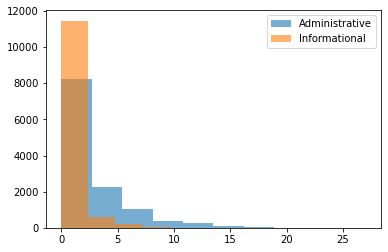

In [12]:
plt.hist(df['Administrative'],alpha = 0.6,label = "Administrative")
plt.hist(df['Informational'],alpha = 0.6,label = "Informational")
#plt.hist(df['ProductRelated'],alpha = 0.6,label = "ProductRelated")
plt.legend()

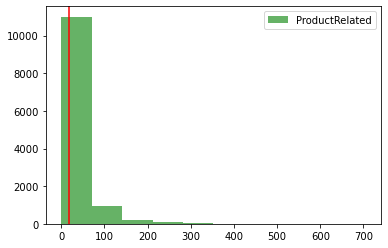

In [13]:
plt.hist(df['ProductRelated'],alpha = 0.6,label = "ProductRelated",color = 'g')
pg_count3 = df['ProductRelated'].median()
plt.axvline(x = pg_count3, color = 'r') # red line indicating the median value
plt.legend()

#### From the two histograms above, we could see that people tend to view more pages in product related sites compared with the `Administrative` and `Informational` pages.

In [14]:
duration_count1 = df['Administrative_Duration'].median()
duration_count2 = df['Informational_Duration'].median()
duration_count3 = df['ProductRelated_Duration'].median()
print(duration_count1,duration_count2,duration_count3)

7.5 0.0 598.9369047499999


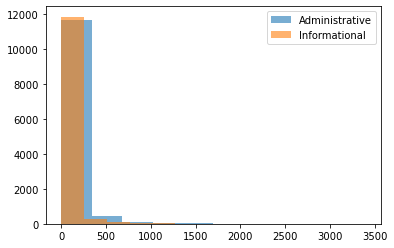

In [15]:
plt.hist(df['Administrative_Duration'],alpha = 0.6,label = "Administrative")
plt.hist(df['Informational_Duration'],alpha = 0.6,label = "Informational")
plt.legend()

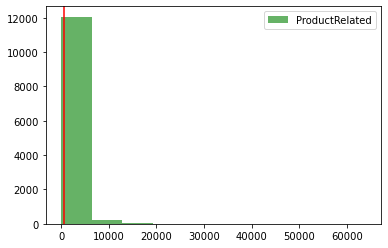

In [16]:
plt.hist(df['ProductRelated_Duration'],alpha = 0.6,label = "ProductRelated",color = 'g')
plt.axvline(x = duration_count3, color = 'r') # red line indicating the median value
plt.legend()

#### In this three columns, it follows the same pattern as the previous three columns: People tends to read more/spend more time in reading the `ProductRelated` pages whereas not tending to spend time in `Informational` pages.

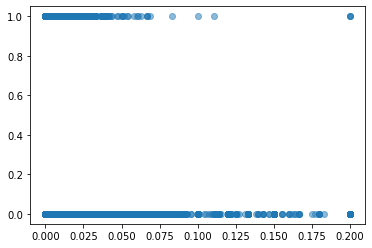

In [17]:
# Bounce Rate vs. Exit Rates
plt.scatter(df['BounceRates'], df['Revenue'],alpha = 0.5)

In [18]:
buy_bounce_rate = df[df['Revenue'] == 1]['BounceRates'].mean()
not_buy_bounce_rate = df[df['Revenue'] == 0]['BounceRates'].mean()
print(buy_bounce_rate,not_buy_bounce_rate)
buy_exit_rate = df[df['Revenue'] == 1]['ExitRates'].mean()
not_buy_exit_rate = df[df['Revenue'] == 0]['ExitRates'].mean()
print(buy_exit_rate,not_buy_exit_rate)

0.005117152640461212 0.025317232197850356
0.019555168256813433 0.04737827052648154


#### We can clearly see that if people are buying the products, then the bouncerate is lower (~0.005) whereas people not buying the products having a bounce rate about 0.25. Similarily, the exit rate for people that are not buying the products is 0.47 compared with those who are buying the products: 0.019.

In [19]:
# df['PageValues'] is not that meaningful to our question

The buy rate on special day is 0.06493506493506493
The not-buy rate on special day is 0.935064935064935
The buy rate on normal day is 0.16526762343171766
The not-buy rate on normal day is 0.8347323765682824


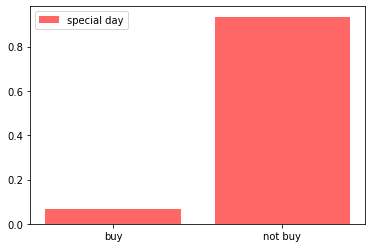

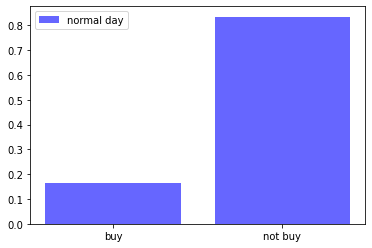

In [20]:
buy_special_day = df[(df['SpecialDay'] == 1) & (df['Revenue'] == 1)].shape[0]
not_buy_special_day = df[(df['SpecialDay'] == 1) & (df['Revenue'] == 0)].shape[0]
speical_day_count = df[(df['SpecialDay'] == 1)].shape[0]
print(f"The buy rate on special day is {buy_special_day/speical_day_count}")
print(f"The not-buy rate on special day is {not_buy_special_day/speical_day_count}")

x = [(buy_special_day/speical_day_count),(not_buy_special_day/speical_day_count)]
plt.bar(['buy','not buy'],x, label = 'special day',color = 'r',alpha = 0.6)
plt.legend()

buy_normal_day = df[(df['SpecialDay'] == 0) & (df['Revenue'] == 1)].shape[0]
not_buy_normal_day = df[(df['SpecialDay'] == 0) & (df['Revenue'] == 0)].shape[0]
normal_day_count = df[(df['SpecialDay'] == 0)].shape[0]
print(f"The buy rate on normal day is {buy_normal_day/normal_day_count}")
print(f"The not-buy rate on normal day is {not_buy_normal_day/normal_day_count}")

x = [(buy_normal_day/(normal_day_count)),(not_buy_normal_day/normal_day_count)]
plt.figure()
plt.bar(['buy','not buy'],x,label = 'normal day', color = 'b', alpha = 0.6)
plt.legend()

#### Based on the rate above, if it's a special day, the rate of buying is 0.65. Suprisingly, the buying rate seems to be higher in normal days compared with the special days. We think the reason behind is that the sample size for `SpecialDay` is smaller than the normal days.

In [21]:
#df.columns
# Month columns include 'Aug', 'Dec', 'Feb', 'Jul','June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',]
month_lst = ['Aug', 'Dec', 'Feb', 'Jul','June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',]
buying_count_over_month = [df[(df[i] == 1) & (df['Revenue'] == 1)].shape[0] for i in month_lst]
for i in range(len(buying_count_over_month)):
    print(f"The buying count in {month_lst[i]} month is {buying_count_over_month[i]}")

KeyError: 'Aug'

#### From the above count calculation, we could see that the highest two counts of buying records happened in Nov and Oct. It might due to the black Friday and sales season. The black Friday happens in November. 

In [ ]:
df.columns

In [ ]:
new_buy = df[(df['New_Visitor'] == 1) & (df['Revenue'] == 1)].shape[0]
new_ = df[(df['New_Visitor'] == 1)].shape[0]

return_buy = df[(df['Returning_Visitor'] == 1) & (df['Revenue'] == 1)].shape[0]
return_  = df[(df['Returning_Visitor'] == 1)].shape[0]

print(f"The percentage of new users buying the product is {new_buy/new_}")
print(f"The percentage of returning users buying the product is {return_buy/return_}")

In [ ]:
buy_weekend = df[(df['Weekend'] == 1) & (df['Revenue'] == 1)].shape[0]
not_buy_weekend = df[(df['Weekend'] == 1) & (df['Revenue'] == 0)].shape[0]
print(buy_weekend,not_buy_weekend,buy_weekend/(buy_weekend+not_buy_weekend))

buy_nonweekend = df[(df['Weekend'] == 0) & (df['Revenue'] == 1)].shape[0]
not_buy_nonweekend = df[(df['Weekend'] == 0) & (df['Revenue'] == 0)].shape[0]
print(buy_nonweekend,not_buy_nonweekend,buy_nonweekend/(buy_nonweekend+not_buy_nonweekend))

#### The people tend to not to buy on weekends. However, compared with the week days, the buying rate on weekends is still a little bit higher than the weekdays.

## Proposed Solution

For this project, we aim to predict if the consumer would make a purchase based on the dataset featuring multiple aspects of online shopping behavior. We will employ 4 different machine learning models: logistic regression, K-NN, decision trees, and SVMs (other proper models may be employed after exploration). The deliberate decision of choosing those 4 models stems from the fact that the dataset contains 17 numeric input variables and 1 categorical output variable. Thus, only classification models such as K-NN, decision trees and SVMs would be considered. In addition, considering the binary nature of output values, logistic regression seems viable too. The main coding component would involve sklearn, such as LogisticRegression from sklearn.linear_model, KNeighborsClassifier from sklearn.neighbors, DecisionTreeClassifier from sklearn.tree, and SVC from sklearn.svm. We will then compare the performance of each model to determine the best fit for the dataset using a confusion matrix as stated below. 

## Evaluation Metrics

We will apply the confusion matrix, which gives us a matrix as output and describes the complete performance of the model. In the confusion matrix, every row will be ground truth and every column will be the prediction. We can calculate the recall and precision value to evaluate the relationship between the . 

In addition, classification accuracy will be the major evaluation metric in this project, which is the ratio of the number of correct predictions to the total number of input samples. For example, we will use model selection to split our training and testing sets into two sets of X and Y, where X is the set of features on customers behavior and days and Y is the result of whether customers purchase or not. After we generate our predictions using models, we will print out the classification report using sklearn.metrics packages to see the accuracy result of the predictions compared to the testing Y.

## Ethics & Privacy

This dataset is a public dataset obtained from the UCI Machine Learning Repository. The personal  identification information has been erased from the dataset before we obtained the data to ensure anonymity, so there should be no privacy issues for our project. 

However, there is no information about when those data were collected, and whether they are representative of a typical online shopping customer. Therefore, there might be some biases in our dataset which will result in some undesirable variation in our model.

Another ethical concern would be that scammers could utilize this model to take unfair advantage on targeting their potential victims more precisely by selecting those who are more prone to make a purchase according to the algorithm we designed. Thus,  we should declare this project for educational purposes only and place justifiable concerns if we decide to make our model public on github.

## Team Expectations 

* Positive attitude towards the project and the group
* Fully respect for other people’s ideas and work
* Meet weekly on zoom or in-person (to work on schedules, assign work, set goals, and discuss problems)
* Update status in chat group and feel free to ask questions
* Work assigned evenly among team members
* Be accountable for the work assigned
* Don’t procrastinate (follow the team schedule once set)
* Communication first facing conflict or difficulty
* Majority voting for problems truly can’t be solved through negotiation 


## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| April 24, 2022 |  15:00-18:00 |  Brainstorm project topics; Do background researches  | Decide topic; Finalize and submit group project proposal | 
| April 29, 2022 |  15:00-18:00 | Review data cleaning techniques; Complete peer review of proposals  | Discuss what we can learn from the peer review; Discuss how to do data cleaning, then assign work to everyone | 
| May 2, 2022 | 15:00-18:00  | Review EDA techniques  | Discuss how to do EDA, then assign work to everyone  |
| May 8, 2022  | 15:00-18:00  | Finish assigned part of data cleaning and EDA |  Finalize data cleaning & EDA; Discuss what ML models to use and assign work to everyone  |
| May 13, 2022  | 15:00-18:00  | Finish assigned part of ML modeling and programming | Finalize ML models; Generate and Submit project checkpoint |
| May 20, 2022  | 15:00-18:00  | Complete peer review of project checkpoint | Discuss what we can learn from the peer review |
| May 29, 2022  | 15:00-18:00  | Brainstorm on further analysis; Draft conclusion |  Discuss and Finalize the project |
| June 8, 2022 | Before 11:59 PM | NA | Confirm and submit final project & complete team eval survey (after meeting)  |

## Footnotes
<a name="rananote"></a>1.[^](#rana): R. A. E. -D. Ahmeda, M. E. Shehaba, S. Morsya and N. Mekawiea, "Performance Study of Classification Algorithms for Consumer Online Shopping Attitudes and Behavior Using Data Mining," 2015 Fifth International Conference on Communication Systems and Network Technologies, 2015, pp. 1344-1349, doi: 10.1109/CSNT.2015.50.. https://ieeexplore.ieee.org/abstract/document/7280138?casa_token=XkLf7qMj_xgAAAAA:nXykZzXHLKrjWwqPlZ8rUtD--pGMmEtgtAcTVaeUcePQ0HST6ZgwEtDnoX4YKhbpolt569EhHx0K<br> 

<a name="sakarnote"></a>2.[^](#sakar): Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0<br>


<a name="carmonanote"></a>3.[^](#carmona): C.J. Carmona, S. Ramírez-Gallego, F. Torres, E. Bernal, M.J. del Jesus, S. García,
Web usage mining to improve the design of an e-commerce website: OrOliveSur.com,Expert Systems with Applications,Volume 39, Issue 12,2012,Pages 11243-11249,ISSN 0957-4174,https://doi.org/10.1016/j.eswa.2012.03.046(https://www.sciencedirect.com/science/article/pii/S0957417412005696)<br>

